In [5]:

import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import datasets, metrics
from collections import Counter
import matplotlib.pyplot as plt
import time
np.random.seed()


In [6]:
def prepare_data():
    iris = datasets.load_iris()
    x = iris.data
    y = iris.target
    return x, y


In [7]:
def eva_hierarchical(x, y):
    k_begin = time.time()
    hier = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average").fit(x, y)
    k_end = time.time() - k_begin
    pre_label = hier.labels_
    key = list(set(pre_label))      # 获取簇标签
    # 重新定义簇标签
    key_c =[]
    for i in key:
        idex = np.where(pre_label == i)
        key_c.append(Counter(y[idex]).most_common(1)[0][0])
    for i in range(pre_label.shape[0]):
        idex = key.index(pre_label[i])
        pre_label[i] = key_c[idex]
    hier_ei = metrics.accuracy_score(y, pre_label)*100
    hier_rt = k_end
    plt.scatter(x[:, 0], x[:, 1], c=hier.labels_)
    plt.show()
    return hier_ei, hier_rt

In [8]:
def eva_dbscan(x, y):
    k_begin = time.time()
    dbs = DBSCAN(eps=0.46,min_samples=11).fit(x, y)
    k_end = time.time() - k_begin
    pre_label = dbs.labels_
    key = list(set(pre_label))  # 获取簇标签
    # 重新定义簇标签
    key_c = []
    for i in key:
        idex = np.where(pre_label == i)
        key_c.append(Counter(y[idex]).most_common(1)[0][0])
    for i in range(pre_label.shape[0]):
        idex = key.index(pre_label[i])
        pre_label[i] = key_c[idex]
    dbs_ei = metrics.accuracy_score(y, pre_label) * 100
    dbs_rt = k_end
    plt.scatter(x[:, 0], x[:, 1], c=dbs.labels_)
    plt.show()
    return dbs_ei, dbs_rt


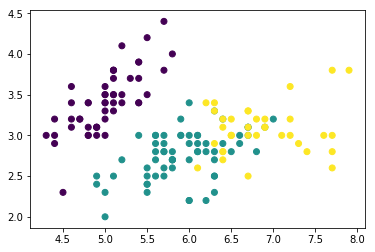

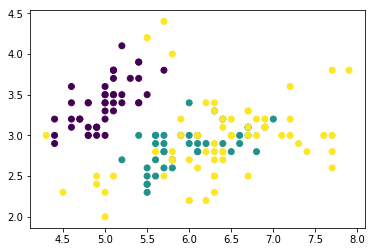

method     #accuracy/%     run_time/s
hierarchical     90.66666666666666      0.049109697341918945
dbscan     89.33333333333333      0.0064487457275390625


In [10]:
x, y = prepare_data()
hier_ei, hier_rt = eva_hierarchical(x, y)
dbs_ei, dbs_rt = eva_dbscan(x, y)
print("method    ","#accuracy/%    ","run_time/s")
print("hierarchical    ",hier_ei,"    ",hier_rt)
print("dbscan    ",dbs_ei,"    ",dbs_rt)